In [1]:
%matplotlib notebook
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout)

## De vuelta al Regresor Lineal...

Podemos revisitar el regresor lineal desde un punto de vista estadistico, para tener una idea de un modelo probabilistico:

$$
\begin{align}
y_i & = f_\theta(x_i) + \epsilon_i \\
    & = b+\sum_{j=1}^M[\theta_jX_{ij}] + \epsilon_i \\
\end{align}
$$

donde $\epsilon_i$ corresponde al error de la observacion $i$. Este es un modelo mucho mas fidedigno a la realidad, pues tiene incorporado el error presente en la medicion de datos. 

A priori no podemos saber cual es el valor de $\epsilon$. Sin embargo, este error se modela como una distribucion Normal, de tal forma que:

$$\epsilon_i = \mathcal{N}(0, \sigma^2)$$

donde $\sigma$ corresponde a la desviacion estandar. 

De esta manera se establece la relacion:

$$p(y\space|\theta^TX) = \mathcal{N}(y\space|\theta^TX)$$

<IPython.core.display.Javascript object>


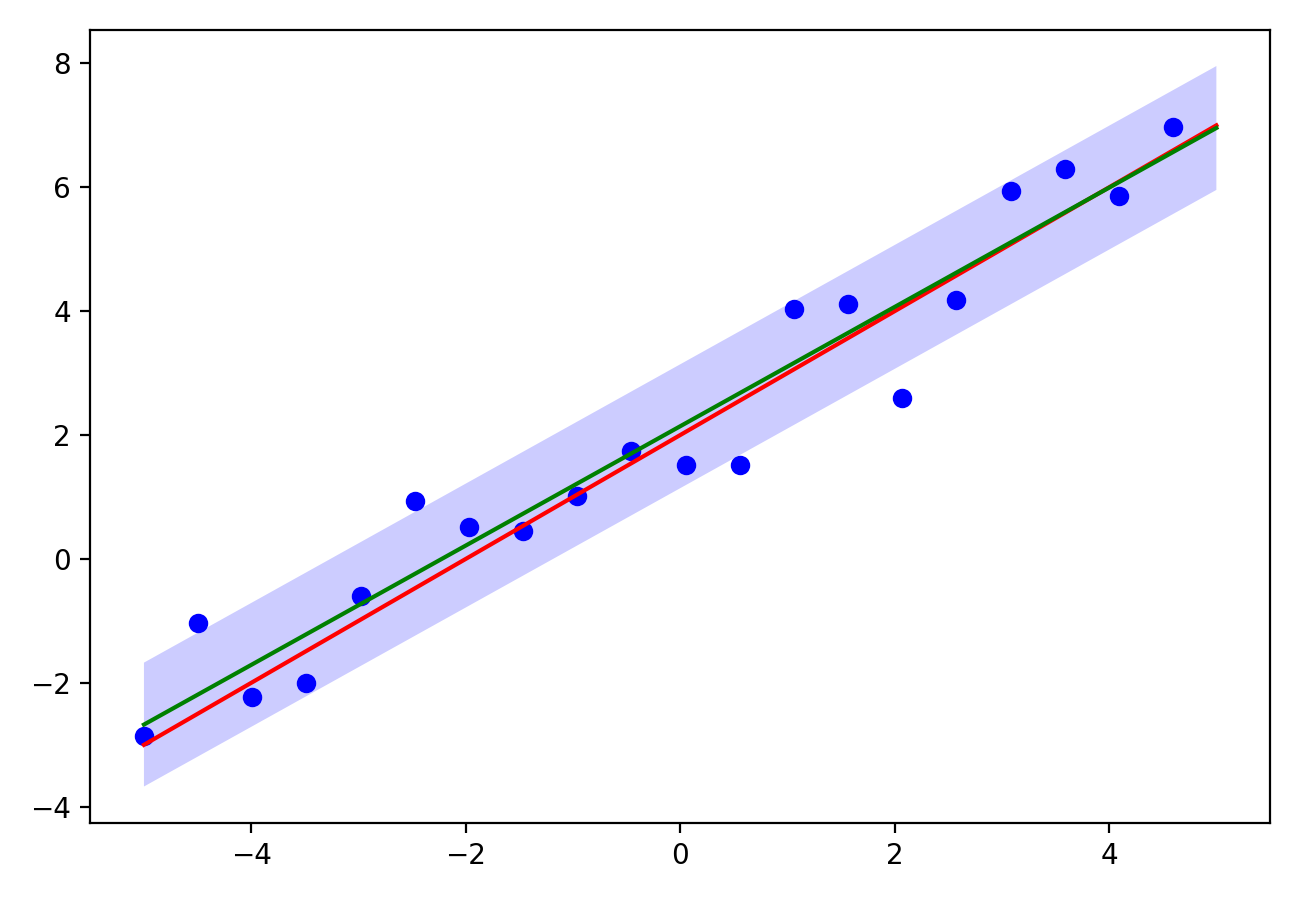

In [2]:
x = np.linspace(-5, 5, 100)
y = x+2
y_err = y + np.random.normal(0, 1, size=100)


fig, ax = plt.subplots(tight_layout=True, figsize=(6.5,4.5))
ax.plot(x[::5],y_err[::5], 'bo')
ax.plot(x,y, 'r')

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1,1)[::5], y_err[::5])

y_hat = model.predict(x.reshape(-1,1))

ax.plot(x,y_hat, 'g')
plt.fill_between(x, y_hat-1, y_hat+1, facecolor='blue', alpha=0.2);

Para encontrar los parametros que mejor se ajustan a un modelo estadistico es comun utilizar un procedimiento conocido como **Estimador de Maxima Verosimilitud** o MLE (Maximum Likelihood Estimator). 
Al resolver el algebra del MLE para el regresor lineal, obtenemos la solucion para los parametros $\theta$ que maximizan la verosimilitud o que minimizan el error y que, por ende, mejor ajustan el modelo a los datos.

El resultado de MLE para la RL probabilistica es: 
$$\theta = (X^TX)X^Ty$$

Que es la solucion de minimos cuadrados vista en la clase 1!

Hasta ahora hemos visto como hacer regresion con RL. Sin embargo, para resolver un problema de clasificacion es necesario un modelo mejor capacitado para datos categoricos. Tal modelo es la **Regresion Logistica**. 

## Regresion Logistica

La **Regresion Logistica** es un modelo para la **clasificacion binaria**. Es decir, solo puede diferenciar entre 2 clases. La salida de la regresion logistica es una probabilidad $p(y\space|X, \theta)$ que nos indica la probabilidad de que la observacion $x_i$ pertenezca a la clase 1.

Podemos ver a la regresion logistica como una extension de la regresion lineal, pues utiliza una transformacion de esta para obtener valores entre $[0, 1]$ interpretables como una probabilidad.

Consideremos un regresor lineal simple:
$$y_i = b+\sum_{j=1}^M[\theta_jX_{ij}] $$

y la funcion de transformacion **Sigmoide**:

$$\mathcal{S}(z_i) = \frac{1}{1+e^{-z_i}}$$

donde $e$ corresponde al numero de Euler.

<IPython.core.display.Javascript object>


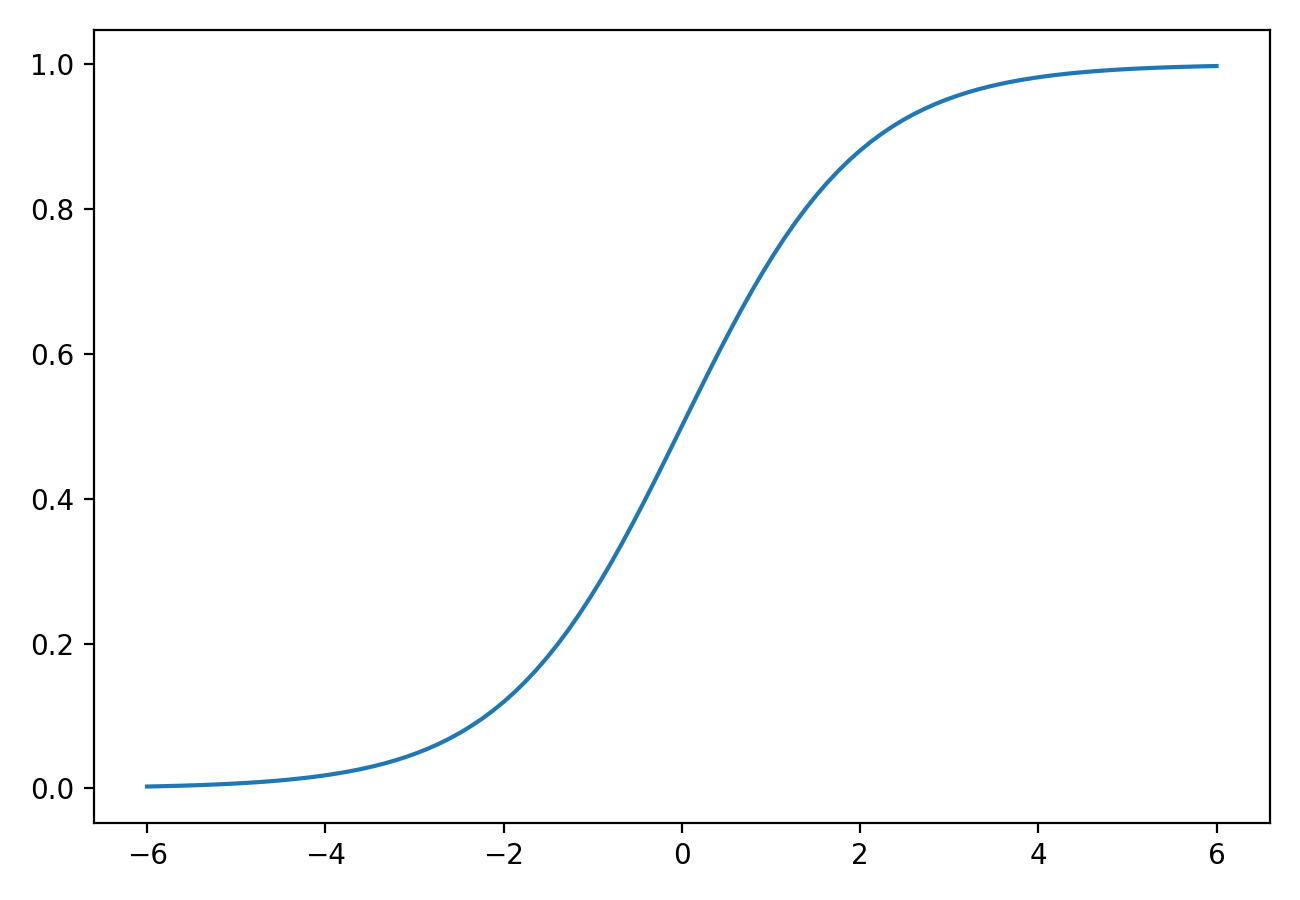

In [4]:
x = np.linspace(-6, 6, 100)
y = 1/(1+np.e**-x)
fig, ax = plt.subplots(tight_layout=True, figsize=(6.5,4.5))
ax.plot(x, y);

El regresor logistico aplica la transformacion $\mathcal{S}$ a una regresion lineal, quedando asi:

$$\mathcal{S}(z_i) = \mathcal{S}(f_\theta(x_i)) = \frac{1}{1+e^{-(b+\sum_{j=1}^M[\theta_jX_{ij}])}}$$

Esto obliga a que la salida del modelo sea un valor dentro del intervalo $[0, 1]$ interpretable como un probabilidad.

El modelo probabilistico utiliza una distribucion **Bernoulli** para modelar la probabilidad:

$$p(y\space|\theta^TX) = \mathcal{Ber}(y\space|\mathcal{S}(\theta^TX))$$

Para poder hacer clasificacion binaria, hace falta definir el umbral o **limite de decicion** (decision boundary) con el cual se definira que probabilidad es suficiente para considerar una observacion como clase 1. Normalmente se utiliza un valor como $p>0.5$.

<IPython.core.display.Javascript object>


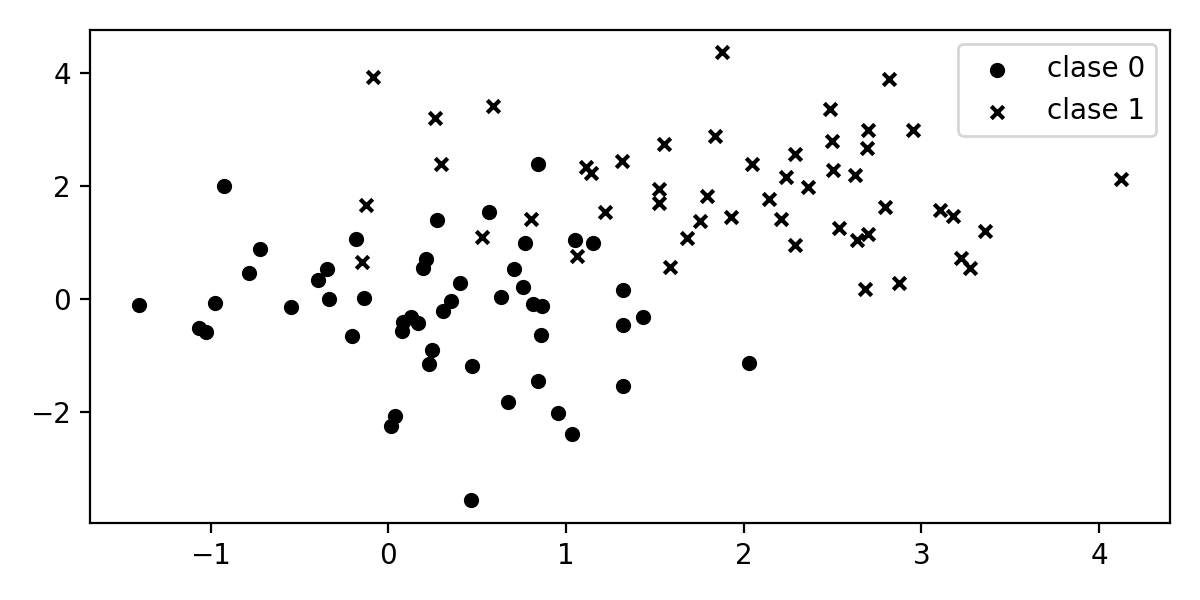

In [3]:
np.random.seed(1234)
data = np.concatenate((np.random.randn(50, 2), 
                       2 + np.random.randn(50, 2)), axis=0)
#data = data - np.mean(data, axis=0, keepdims=True)
label = np.array([0]*50 + [1]*50)

fig, ax = plt.subplots(1, figsize=(6, 3), tight_layout=True)
ax.scatter(data[label==0, 0], data[label==0, 1], c='k', s=20, label='clase 0')
ax.scatter(data[label==1, 0], data[label==1, 1], c='k', s=20, marker='x', label='clase 1')
plt.legend();

<IPython.core.display.Javascript object>


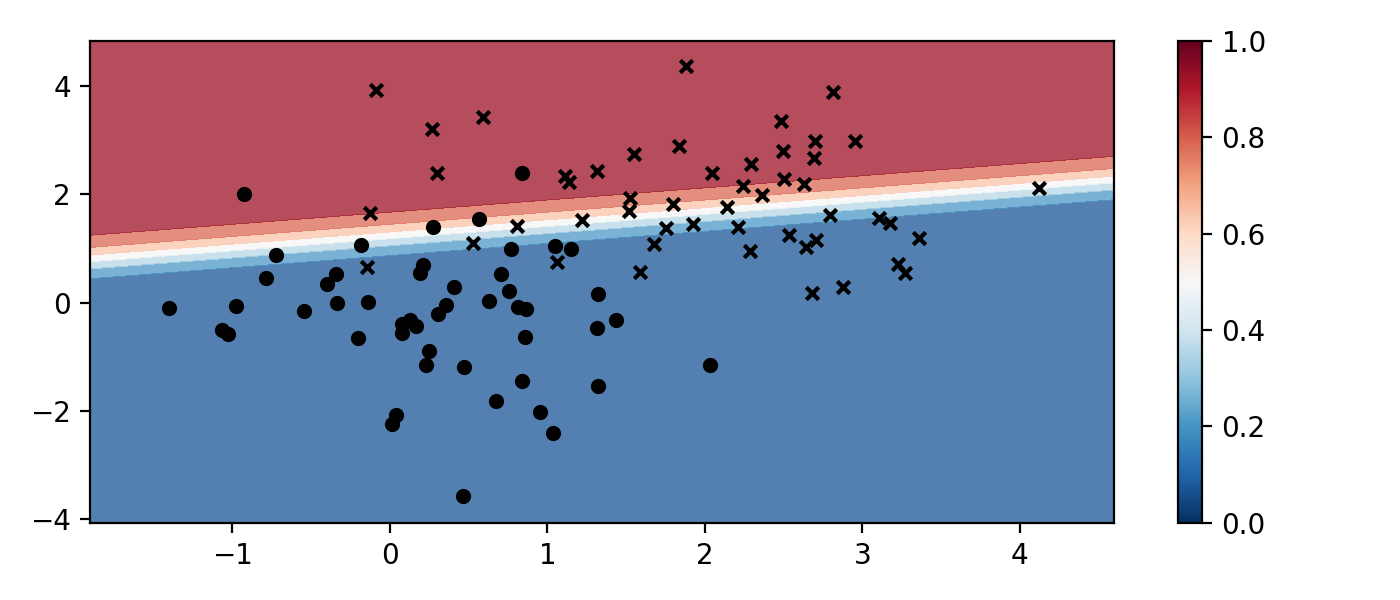

interactive(children=(FloatSlider(value=-1.0, description='t1', layout=Layout(height='20px', width='600px'), m…

In [4]:
fig, ax = plt.subplots(1, figsize=(7, 3), tight_layout=True)

from matplotlib import cm
fig.colorbar(cm.ScalarMappable(cmap=plt.cm.RdBu_r), ax=ax)
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

def sigmoid(X, w, b):
    Z = np.dot(X, w) + b # Transformación lineal
    return 1./(1 + np.exp(-Z)) # Función sigmoide

def update_plot(t1, t2, t0):    
    ax.cla()
    ax.contourf(xx, yy, sigmoid(np.c_[xx.ravel(), yy.ravel()], np.array([t1, t2]), t0).reshape(xx.shape), 
                cmap=plt.cm.RdBu_r, alpha=0.75)
    ax.scatter(data[label==0, 0], data[label==0, 1], c='k', s=20)
    ax.scatter(data[label==1, 0], data[label==1, 1], c='k', s=20, marker='x')
    
widgets.interact(update_plot, 
                 t1=FloatSlider_nice(value=-1, min=-10, max=10),
                 t2=FloatSlider_nice(value=1, min=-10, max=10),
                 t0=FloatSlider_nice(value=0, min=-10, max=10));

### Entrenando el Regresor Logistico

Para hallar cual es la funcion de perdida que mejor ajusta los parametros podemos utilizar la misma tecnica usada para el regresor lineal, el MLE. Aplicando MLE, llegamos a la siguiente funcion de perdida para optimizar el modelo:

$$
\mathcal{L}(\theta) = - \sum_{i=1}^N[y_ilog(\mathcal{S}(z_i)) + (1-y_i)log(1-\mathcal{S}(z_i))]
$$

La cual es bien conocida como **Entropia Cruzada Binaria** (BCE - binary cross entropy).

El siguiente paso es minimizar $\mathcal{L}$:

[Mas sobre entropia](http://colah.github.io/posts/2015-09-Visual-Information/)

$$
\begin{align}
min\space & \mathcal{L}(\theta) \\
min\space & - \sum_{i=1}^N[y_ilog(\mathcal{S}(z_i)) + (1-y_i)log(1-\mathcal{S}(z_i))]
\end{align}
$$

Derivando e igualando a $0$, tenemos:

$$ \begin{align} \frac{d}{d \theta_j} \mathcal{L}(\theta) &= \sum_{i=1}^N \left(-\frac{y_i}{f_\theta( x_i)} + \frac{1-y_i}{1 - f_\theta( x_i)}\right) \frac{d f_\theta( x_i)}{d\theta_j} \nonumber \\ &= -\sum_{i=1}^N (y_i - f_\theta( x_i)) \frac{d z_i}{d\theta_j} \nonumber \\ &= -\sum_{i=1}^N \left(y_i - \mathcal{S} \left(z_i\right) \right) x_{ij} \nonumber \end{align} $$

En este caso no es posible encontrar una solucion analitica para $\theta_j$ debido a la no-linealidad de la funcion Sigmoide.

Entonces como lo hacemos para encontrar los mejores valores de $\theta_j$? Utilizando metodos aproximados.

### Metodo de Newton

El metodo de Newton es un metodo iterativo ampliamente usado para encontrar las raices de funciones. Bajo esta premisa, podemos utilizarlo para encontrar las raices de:

$$
\frac{d}{d \theta_j} \mathcal{L}(\theta)= -\sum_{i=1}^N \left(y_i - \mathcal{S} \left(z_i\right) \right) x_{ij}
$$

Recordando las clases de calculo I, uno puede aproximar cualquier funcion utilizando un polinomio, lo que se conoce como polinomio de Taylor.
El metodo de newton utiliza una aproximacion de taylor de segundo order para encontrar las raices. De tal manera que:

$$
f(\theta_{t} + \Delta \theta) \approx f(\theta_t) + \nabla f (\theta_t) \Delta \theta + \frac{1}{2} \Delta \theta^T H_f (\theta_t) \Delta \theta 
$$

donde $f(\theta_t) = -\sum_{i=1}^N \left(y_i - \mathcal{S} \left(z_i\right) \right) x_{ij}$

Derivando esta funcion con respecto a $\Delta\theta$ e igualando a $0$ tenemos:

$$ \begin{align} \nabla f (\theta_t) + H_f (\theta_t) \Delta \theta &= 0 \nonumber \\ \Delta \theta &= - [H_f (\theta_t)]^{-1}\nabla f (\theta_t) \nonumber \\ \theta_{t+1} &= \theta_{t} - [H_f (\theta_t)]^{-1}\nabla f (\theta_t) \nonumber \\ \end{align} $$

Con esto encontramos una forma de minimizar la funcion de perdida sin necesidad de una solucion analitica. La solucion finalmente es:

$$\theta_{t+1} = \theta_{t} - [H_f (\theta_t)]^{-1}\nabla f (\theta_t)$$

En funcion de $\nabla f$ y $H_f$, por lo tanto se asume que $f$ es doblemente derivable. Tambien introdujimos otro hiperparametro, $\theta_0$ el cual corresponde a la estimacion inicial para $\theta$.

Desafortunadamente esta solucion tambien presenta problemas, pues requiere calcular la inversa de $H_f$, lo que puede dejarnos rapidamente sin recursos computaciones debido a su alta complejidad. Sobretodo por que se deben hacer mas de una iteracion. Recordar que $H_f \in R^{M\times M}$. 

A partir de esto, surje una de los metodos de optimizacion mas conocidos en Machine Learning. El metodo del Gradiente Descendente.

## Gradiente Descendente

El metodo del Gradiente Descendente (gradient descent) consiste en hacer una aproximacion de primer order para evitar calcular el Hessiano, sacrificando precision y estabilidad a cambio de velocidad.

En GD, el esquema iterativo resulta:

$$\theta_{t+1} = \theta_{t} - \eta\nabla f (\theta_t)$$

Donde $\eta$ es un nuevo hiperparametro que reemplaza al Hessiano conocido como **tasa de aprendizaje** (learning rate) el cual controla que tanto hay que variar $\theta$. Generalmente se utilizan valores pequenos.



![gd](gd-step.png)

<IPython.core.display.Javascript object>


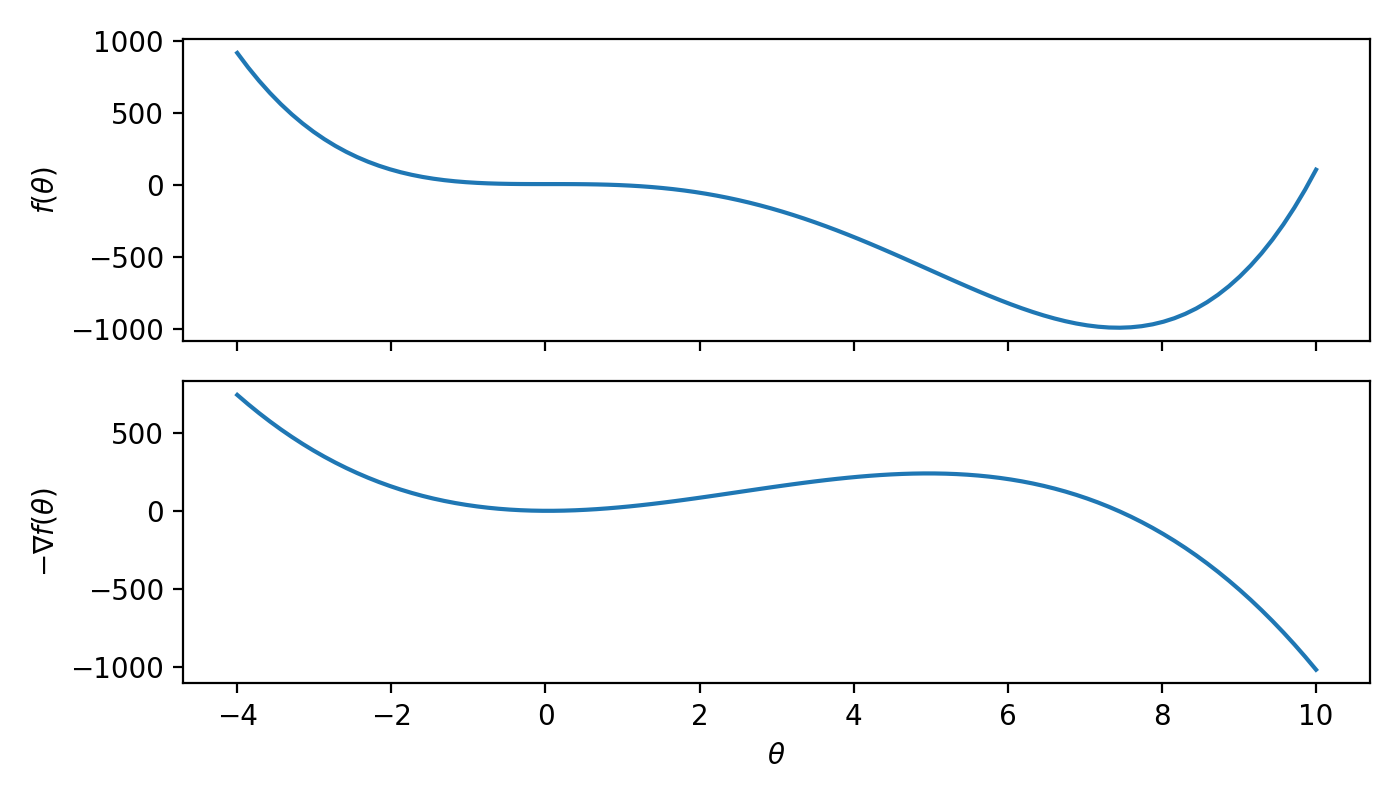

In [17]:
#f = lambda theta : 5 + (theta-5)**2 # (x-5)^2 + 5
#df = lambda theta : 2*theta-10      #   2x - 10


#f = lambda theta : 5 + 10*np.sin(theta)
#df = lambda theta : 10*np.cos(theta)


#f = lambda theta : 5 + 1*theta**2 - 10*theta**3 + theta**4
#df = lambda theta : 2*theta*( - 15*theta + 2*theta**2 + 1)

fig, ax = plt.subplots(2, figsize=(7, 4), tight_layout=True, sharex=True)

x = np.linspace(-4, 10, num=100)

t = 10*np.random.rand(10) - 4. # valores iniciales de theta
ax[0].plot(x, f(x))
sc = ax[0].scatter(t, f(t), s=100)
#ax[0].plot(x, -df(x))
ax[1].set_xlabel(r'$\theta$')
ax[0].set_ylabel(r'$f(\theta)$')
ax[1].set_ylabel(r'$-\nabla f(\theta)$')
ax[1].plot(x, -df(x))


eta = 0.1 # tasa de aprendizaje

def update(n):
    t = sc.get_offsets()[:, 0]
    t -= eta*df(t) # Gradiente descendente
    sc.set_offsets(np.c_[t, f(t)])
    
anim = animation.FuncAnimation(fig, update, frames=100, interval=200, repeat=False, blit=True)


<IPython.core.display.Javascript object>


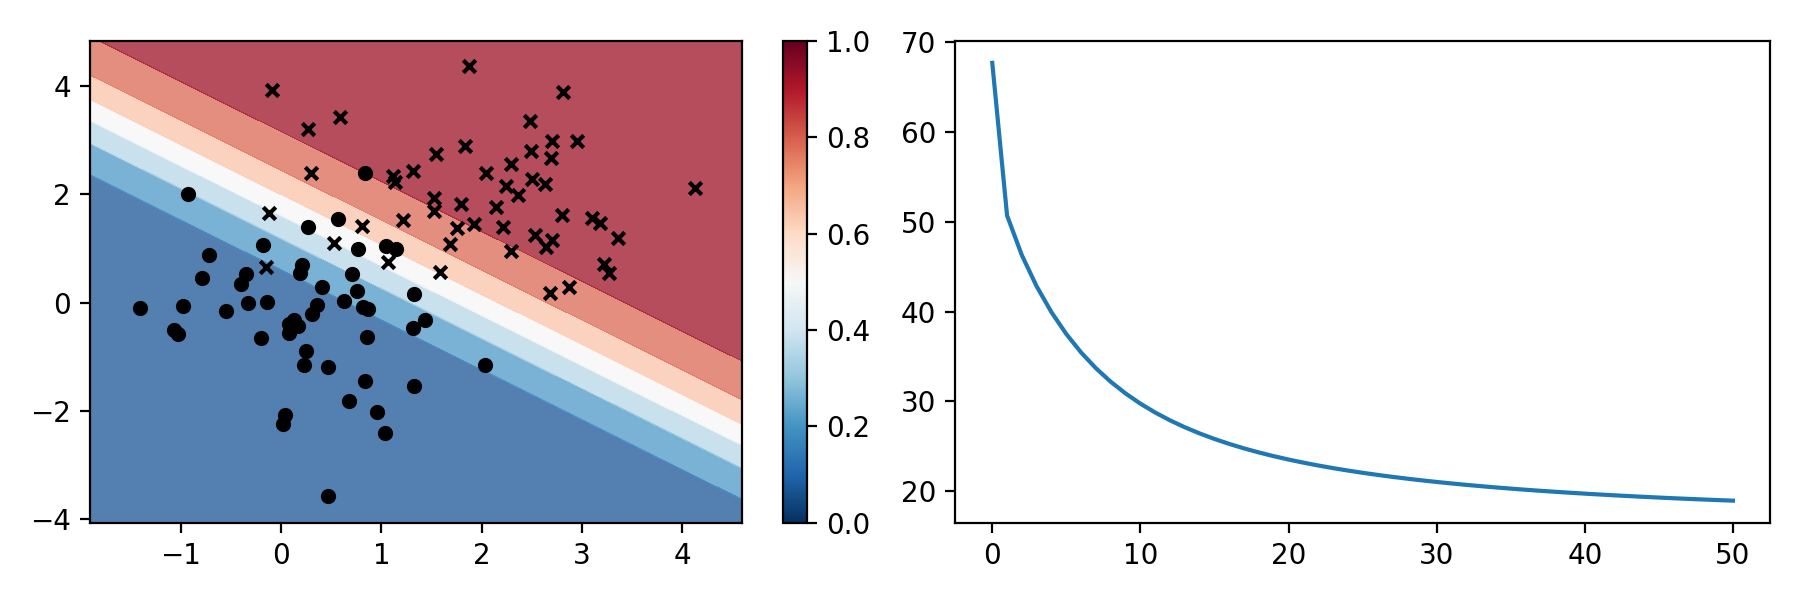

In [20]:
from matplotlib import cm

fig, ax = plt.subplots(1, 2, figsize=(9, 3), tight_layout=True)
fig.colorbar(cm.ScalarMappable(cmap=plt.cm.RdBu_r), ax=ax[0])

def sigmoid(X, theta):
    Z = np.dot(X, theta[1:]) + theta[0] # Transformación lineal
    return 1./(1 + np.exp(-Z)) # Función sigmoide

def loss(theta, X, Y, tol=1e-8): # Función de costo
    f = sigmoid(X, theta)
    return -np.sum(Y*np.log(f + tol) + (1.-Y)*np.log(1.-f+tol))

def grad_loss(theta, X, Y): # Gradiente
    f = sigmoid(X, theta)
    return -np.dot(Y-f, np.hstack((np.ones(shape=(len(data), 1)), data)))

eta = 1e-2 # Tasa de aprendizaje
np.random.seed(1234)
t = 0.5*np.random.randn(3) # Solución inicial
L_history = []

def update_plot(k):    
    global t, L_history    
    L_history.append(loss(t, data, label)) # Valor histórico de la loss
    
    gradL = grad_loss(t, data, label)
    t -= eta*gradL # Gradiente descendente
    
    ax[0].cla()
    ax[0].contourf(xx, yy, sigmoid(np.c_[xx.ravel(), yy.ravel()], t).reshape(xx.shape), 
                cmap=plt.cm.RdBu_r, alpha=0.75)
    ax[0].scatter(data[label==0, 0], data[label==0, 1], c='k', s=20)
    ax[0].scatter(data[label==1, 0], data[label==1, 1], c='k', s=20, marker='x')
    ax[1].cla()
    ax[1].plot(L_history)

anim = animation.FuncAnimation(fig, update_plot, frames=50, interval=250, repeat=False, blit=True)

## Metricas de evaluacion para un clasificador binario

[Source](https://github.com/phuijse/INFO257)


Recordar que la salida de este clasificador es un valor en el rango $[0, 1]$

Una vez definido el umbral $\mathcal{T}$ se puede tomar un decisión binaria tal que

$$
d_i = 
\begin{cases} 
0, & \text{si } f_\theta(\vec x_i)  < \mathcal{T} \\ 
1, & \text{si } f_\theta(\vec x_i) \geq \mathcal{T}
\end{cases}
$$

Una vez seleccionado el umbral se puede contar la cantidad de 
- **True positives** (TP): Era clase (1) y lo clasifico como (1)
- **True negative** (TN): Era clase (0) y lo clasifico como (0)
- **False positives** (FP): Era clase (0) y lo clasifico como (1): Error tipo I
- **False negative** (FN): Era clase (1) y lo clasifico como (0): Error tipo II

A partir de estas métricas se construye la **matriz de confusión** del clasificador

|Clasificado como/En realidad era|Positivo|Negativo|
|---|---|---|
|Positivo:|TP | FP |
|Negativo:| FN | TN |

En base a estas métricas se construyen otras 

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

también conocida como la **Tasa de verdaderos positivos** (TPR) o sensitividad

> TPR: La proporción de positivos correctamente clasificados respecto al total de positivos

$$
\text{FPR} = \frac{FP}{TN + FP} = 1 - \frac{TN}{TN + FP}
$$

la **tasa de falsos positivos** (FPR) también representada como "1 - especificidad"


> FPR: La proporción de negativos incorrectamente clasificados respecto al total de negativos

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

también conocido como pureza

> Precision: La proporción de positivos correctamente clasificados respecto a todos los ejemplos clasificados como positivo

$$
\text{Accuracy} = \frac{TP+TN}{TP + FP + FN+ TN}
$$

> Accuracy: La proporción de ejemplos correctamente clasificados

$$
\text{f1-score} = \frac{2\cdot\text{Recall}\cdot\text{Precision}}{\text{Recall} + \text{Precision}}
$$

> f1-score: Media armónica entre Recall y Precision asumiendo igual ponderación

Si las clases son desbalanceadas entonces f1-score es más aconsejable que accuracy

### Ejemplo: Evaluando el regresor logístico

Podemos usar las funciones de `sklearn.metrics` para obtener matrices de confusión, reportes y curvas de desempeño

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

probability = sigmoid(data, t)

display("Matriz de confusión:")
display(confusion_matrix(y_true=label, y_pred=probability>0.5))

display("Matriz de confusión:")
print(classification_report(y_true=label, y_pred=probability>0.5))

'Matriz de confusión:'

array([[46,  4],
       [ 3, 47]])

'Matriz de confusión:'

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.92      0.94      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [12]:
probability

array([0.15757929, 0.40064262, 0.54778778, 0.27996439, 0.04872468,
       0.71581187, 0.08159691, 0.34437099, 0.47821161, 0.14392926,
       0.21136236, 0.53256978, 0.35179942, 0.09192738, 0.63559625,
       0.42556446, 0.7208534 , 0.40531811, 0.30028342, 0.9125063 ,
       0.24468346, 0.05828672, 0.19303074, 0.36329325, 0.48701698,
       0.13804505, 0.24809045, 0.29435162, 0.38757708, 0.79140598,
       0.28206633, 0.3405141 , 0.05694778, 0.24812624, 0.57474114,
       0.4274215 , 0.5662681 , 0.79307563, 0.15246303, 0.42946861,
       0.01391182, 0.51668542, 0.27896864, 0.68776953, 0.74435603,
       0.27993866, 0.18067168, 0.41211515, 0.48133087, 0.19059992,
       0.95322964, 0.94151203, 0.98103125, 0.82263721, 0.78783851,
       0.67459009, 0.95111949, 0.88453711, 0.63351893, 0.93974829,
       0.8245338 , 0.92764078, 0.8973088 , 0.86032143, 0.96337526,
       0.92727148, 0.99036206, 0.81244749, 0.97619557, 0.95460419,
       0.89583922, 0.83318083, 0.89281805, 0.97352039, 0.99212

<IPython.core.display.Javascript object>


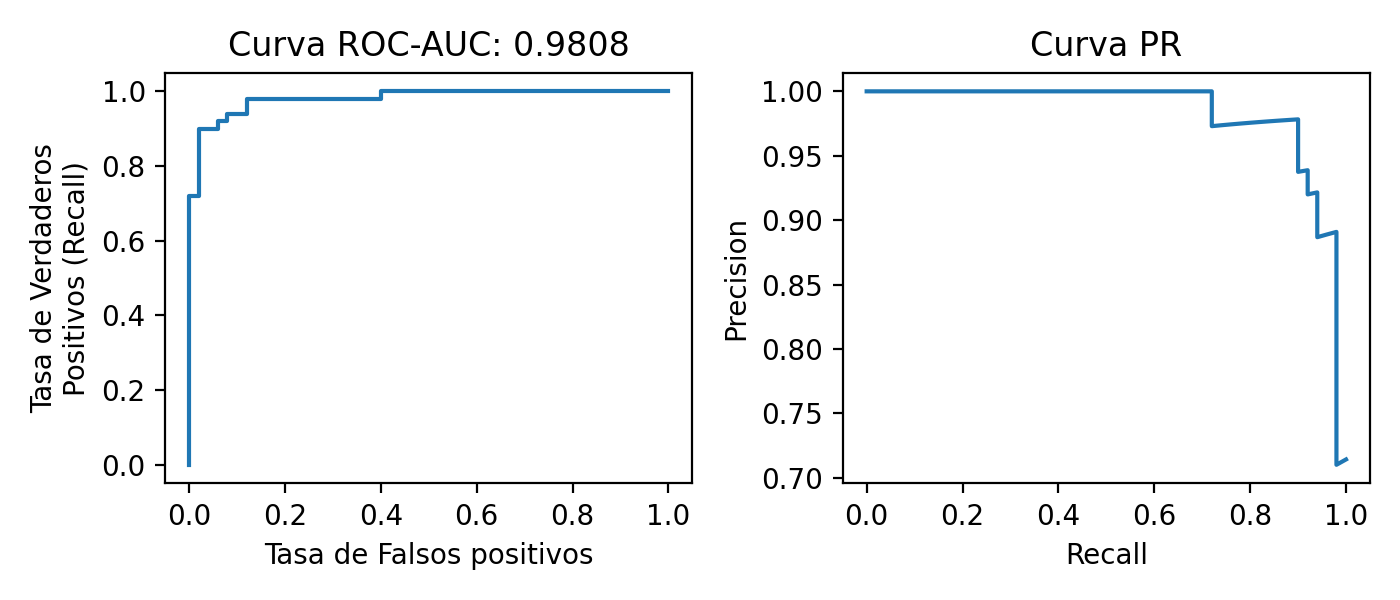

In [23]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

fpr, tpr, th = roc_curve(y_true=label, y_score=probability)

fig, ax = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True)
ax[0].plot(fpr, tpr);
ax[0].set_xlabel('Tasa de Falsos positivos')
ax[0].set_ylabel('Tasa de Verdaderos\nPositivos (Recall)')
ax[0].set_title(f'Curva ROC y AUC: {auc(fpr, tpr)}')

prec, rec, th = precision_recall_curve(y_true=label, probas_pred=probability)

ax[1].plot(rec, prec, '-');
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Curva PR');

# Ojo con:


#### La distribución de los datos donde se aplicará el clasificador es distinta a la que usaste para entrenar/validar

Actualiza tus conjuntos de datos para que sean representativos!

#### Usa los subconjuntos adecuadamente

Ajusta los parámetros con el set de validación

Compara distintas familias de modelos con el set de prueba


#### La métrica que usas no es la adecuada para el problema

Si el problema tiene clases desbalanceadas el *accuracy* puede ser muy alto, contrasta usando métricas sencibles al desbalance (e.g. *f1-score*)

#### Mi modelo se sobreajusta de inmediato

Prueba disminuyendo la complejidad/arquitectura del modelo o añadiendo **regularización**

Esto también puede ser señal de que necesitas más ejemplos para entrenar

Se pueden usar **Técnicas de aumentación** de datos

#### Mi modelo no está aprendiendo

Si estas seguro que no hay bugs prueba aumentando la complejidad del modelo

#### Estudia los errores de tu modelo para mejorarlo

Analiza los datos mal clasificados y busca patrones

Revisa que las etiquetas estén correctas

Revisa que los atributos estén adecuadamente calculados

Propon nuevos atributos que ayuden a clasificador los ejemplos difíciles

